# Projet : analyse de data

### L'économie française peut-elle survivre sans le tourisme ?

##### Le but de cette étude va être d'étudier différents paramètres d'influence sur le tourisme afin de trouver certains relations de causalité entre densité de tourisme et paramètre du pays en question. 

##### Comme notre tableau se compose uniquement de chiffre, on va tracer beaucoup de graphiques (sans faire énormément de probabilités/pourcentages comme on aurait pu le faire avec la version du cours sur le titanic, où on peut demander le pourcentage de femmes en première classe etc... qui semble moins adaptés et pertinentes pour le cadre d'étude fixé sur les correlations, qui elles nécessitent beaucoup de courbes).

Quentin BONNET

Nathan BOUTHORS

Eliott FAYOLLE

Baptiste MICHAUD

Yvon PEREZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('stats_tourisme.csv')
df.head()

,Pays,Dépense étrangère dans le pays pour le tourisme ($US2021),Dépense internationale pour les voyages à l'étranger ($US2021),Hôtes locaux (hôtels),Hôtes étrangers (hôtels),Nombre moyen de nuits passées par les touristes étrangers,Nombre de voyages des habitants dans un autre endroit du pays par an,Nombre de passagers aériens,Touristes annuels,Nombre d'employés dans le tourisme pour 1000 habitants,Nombre de départs à l'étranger par an pour 1000 habitants,Nombre d'employés dans la restauration pour 1000 habitants,Nombre de voyages d'une seule journée depuis l'étranger pour 1000 habitants,PIB / habitant,Population,PIB,Part du tourisme dans le PIB
0,Albania,5.166606e+09,1876012300,430000.0,736000.0,3.0,NaN,307741.0,6128000.0,18.0,NaN,NaN,96.4,13653,2402113,32796048789,15.753746
1,Algeria,NaN,676212350,3719000.0,NaN,2.0,NaN,6752002.0,NaN,7.4,132.4,NaN,NaN,11627,46700000,542980900000,0.000000
2,Argentina,NaN,8320167400,16289000.0,NaN,2.0,1.0,19461376.0,7400000.0,28.0,202.7,11.3,NaN,22072,47067441,1038872557752,0.000000
3,Australia,4.483945e+10,36791038000,40088000.0,4515000.0,NaN,4.6,76850600.0,NaN,27.5,NaN,10.6,NaN,49421,27122411,1340416674031,3.345188
4,Austria,2.853797e+10,12283111000,11144000.0,22662000.0,3.0,1.5,46476600.0,31884000.0,23.2,1340.2,NaN,NaN,5577,9179693,51195147861,55.743500


Notre étude se base sur les données récupérées sur la page https://ourworldindata.org/tourism.
Nous nous intéressons à la place du tourisme dans l'économie et la culture de 59 pays des 5 continents. Nous avons privilégié les pays les plus peuplés qui comptaient suffisamment de données disponibles.

Pour ce qui est de la gestion des valeurs manquantes, on travaillera au cas par cas à les enlever en créant des dataframe intermédiaires en fonction des grandeurs étudiées, car si on trie tout dès le départ sur toutes les cases, on risque de ne garder que quelques (voire aucun) pays complets sur toutes les données.

La liste des pays :

In [3]:
df['Pays']

0            Albania
1            Algeria
2          Argentina
3          Australia
4            Austria
5            Belgium
6             Brazil
7           Bulgaria
8           Cameroon
9             Canada
10         CapeVerde
11             Chile
12             China
13          Colombia
14           Croatia
15            Cyprus
16           Czechia
17           Denmark
18             Egypt
19           Estonia
20           Finland
21            France
22           Georgia
23           Germany
24            Greece
25           Hungary
26           Iceland
27             India
28         Indonesia
29           Ireland
30            Israel
31             Italy
32             Japan
33            Latvia
34        Luxembourg
35             Malta
36            Mexico
37           Morocco
38       Netherlands
39    NorthMacedonia
40            Norway
41              Peru
42       Philippines
43            Poland
44          Portugal
45           Romania
46            Russia
47       Saud

### L'importance du tourisme pour les différents pays du monde

On va regarder si tous les pays ont des caractéristiques similaires vis-à-vis du tourisme.

On trace pour chaque pays le nombre de touristes qui sont venus au cours de l'année 2019 en fonction du nombre d'habitants du pays. L'axe des abscisses (correspondant à la population) est en échelle logarithmique pour améliorer la visibilité.

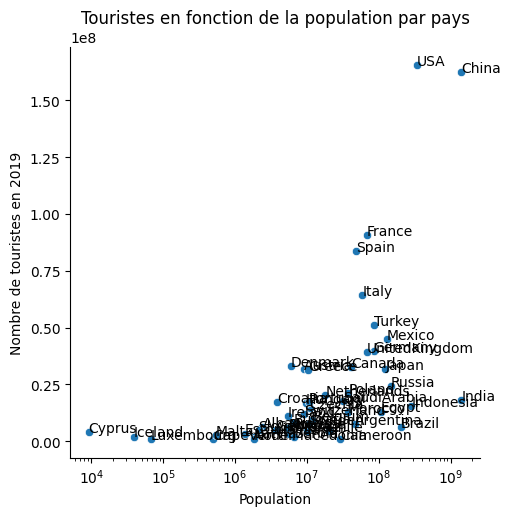

In [4]:
pays_par_touristes = df.loc[df['Touristes annuels'].notna(), ['Pays', 'Touristes annuels', 'Population']]

graphique = sns.relplot(data = pays_par_touristes, x = 'Population', y = 'Touristes annuels', kind = 'scatter')
graphique.set(xscale="log", xlabel = "Population", ylabel = "Nombre de touristes en 2019", title = "Touristes en fonction de la population par pays")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(pays_par_touristes['Population'],pays_par_touristes['Touristes annuels'], pays_par_touristes['Pays'], plt.gca())


On constate que tous les pays ne se valent pas : notamment la France, l'Espagne, l'Italie et les Etats-Unis accueillent beaucoup d'étrangers par rapport à leur nombre d'habitants. Il semblerait donc que le tourisme soit un domaine important pour ces pays.

### Importance économique du tourisme

Comparaison des sommes investies, du nombre d'employés

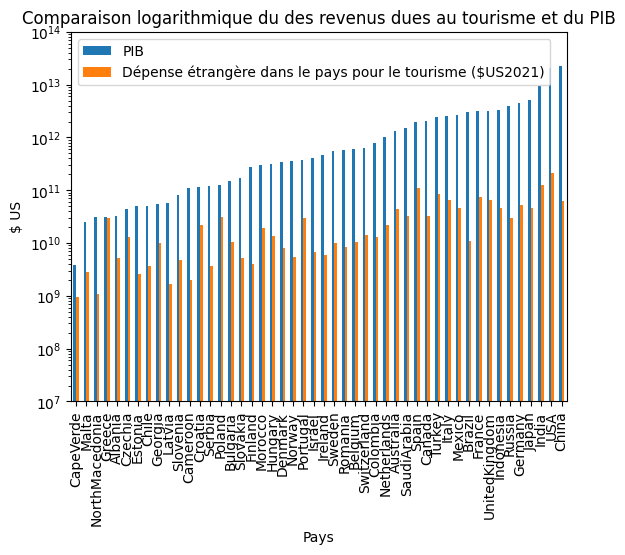

In [5]:
depenses = df.loc[df["Dépense étrangère dans le pays pour le tourisme ($US2021)"].notna() & df["PIB / habitant"].notna(), ["Pays","Dépense étrangère dans le pays pour le tourisme ($US2021)","PIB / habitant","Population","PIB", "Part du tourisme dans le PIB"]]
depenses=depenses[depenses["Pays"]!="Luxembourg"]
depenses=depenses[depenses["Pays"]!="Iceland"]
depenses=depenses[depenses["Pays"]!="Austria"]
depenses=depenses[depenses["Pays"]!="Cyprus"]
depenses = depenses.sort_values(by="PIB")
graph=depenses.plot.bar(x="Pays", y=["PIB","Dépense étrangère dans le pays pour le tourisme ($US2021)"], log=True, rot=90)
graph.set(ylim=(10**7,10**14), title="Comparaison logarithmique du des revenus dues au tourisme et du PIB", ylabel="$ US", xlabel="Pays")
plt.show()

On a tracé ici, pour chaque pays, la comparaison entre le PIB et le revenu dû aux tourisme étranger. Attention, il s'agit d'une echelle logarithmique qui permet d'apprecier un resultat uniquement qualitatif.
On remarque l'importance de ce secteur pour beaucoup de pays notamment les pays les moins riches pour lesquels le tourisme représente une plus grande part de leur économie.

On peut souligner cette remarque à l'aide du graphique suivant qui represente la part des revenues dû au secteur du tourisme étranger dans le PIB des pays (en %). En considérqnt que les pays sont toujours ordonnés dans l'ordre croissant des PIB.

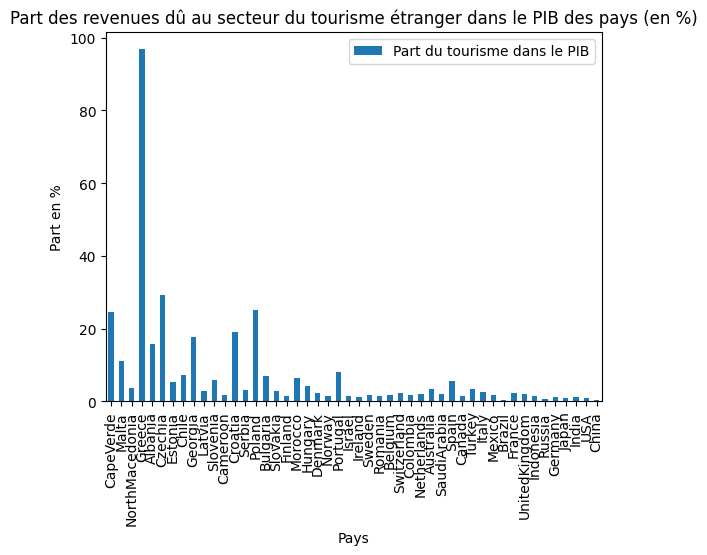

In [6]:
graph2= depenses.plot.bar(x="Pays", y="Part du tourisme dans le PIB", rot=90)
graph2.set(title="Part des revenues dû au secteur du tourisme étranger dans le PIB des pays (en %)", xlabel="Pays", ylabel="Part en %")
plt.show()

Il convient également de noter à quel point le tourisme est un secteur important pour monsieur, madame tout le monde, tant le nombre d'employés du domaine est important comme le montre le graphique suivant. 

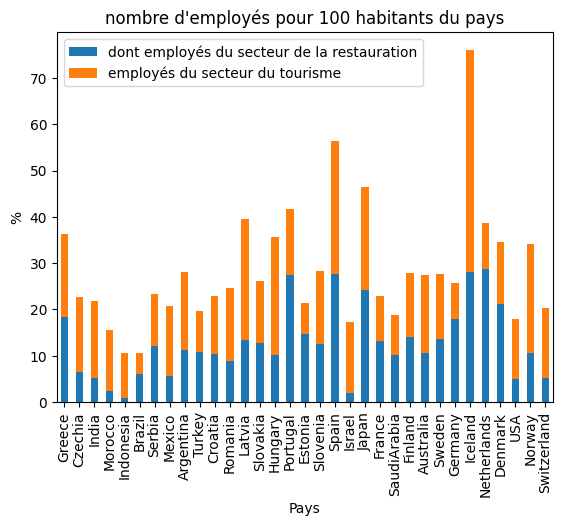

In [7]:
travail=df.loc[df["Nombre d'employés dans le tourisme pour 1000 habitants"].notna() & df["Nombre d'employés dans la restauration pour 1000 habitants"].notna(), ["Pays","Nombre d'employés dans la restauration pour 1000 habitants","Nombre d'employés dans le tourisme pour 1000 habitants","Population","PIB","PIB / habitant"]]
travail["diff"]=travail["Nombre d'employés dans le tourisme pour 1000 habitants"]-travail["Nombre d'employés dans la restauration pour 1000 habitants"]
travail=travail.sort_values(by="PIB / habitant")
travail.plot.bar(x="Pays", y=["Nombre d'employés dans la restauration pour 1000 habitants","diff"], stacked=True, label=["dont employés du secteur de la restauration","employés du secteur du tourisme"], xlabel="Pays", title="nombre d'employés pour 100 habitants du pays", ylabel= "%")
plt.show()

On voit donc ici l'impact clair de l'industrie du tourisme et du voyage pour les pays les plus riche également. En effet, les pays sont ici rangés par ordre croissant de PIB / habitant, montrant que ce secteur est primordial pour beaucoup d'habitants des pays les plus riches comme les plus pauvre et permet à une proportion non négligeable d'individus de vivre et de gagner leurs vies.

    Pour résumer, le tourisme est une source importante de valeur ajoutée pour beaucoup de pays.
Les pays les plus pauvres ou plus petits étant les plus
dépendant de cette industrie considérant la part importante que cette dernière occupe dans leur PIB. 
Cependant, on vient de montrer que les pays riches sont également dépendant de cette industrie à l'echelle de l'individu considérant le nombre de personnes dépendant directement du toursime.


### Des différences culturelles ?

Comparaison des déplacements à l'étranger par rapport aux déplacements internes au pays (ainsi que les séjours dans les hôtels)

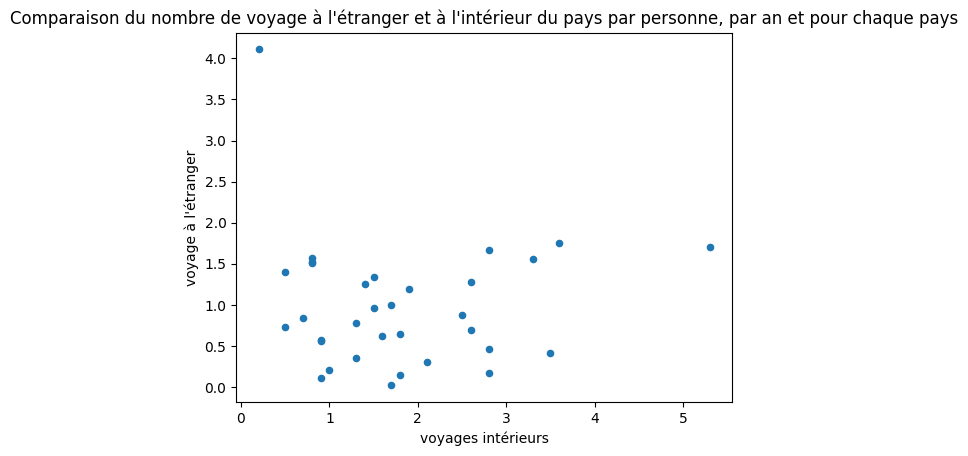

In [11]:
voyages=df.loc[df["Nombre de voyages des habitants dans un autre endroit du pays par an"].notna() & df["Nombre de départs à l'étranger par an pour 1000 habitants"].notna(), ["Nombre de départs à l'étranger par an pour 1000 habitants","Nombre de voyages des habitants dans un autre endroit du pays par an"]]
voyages["/1000"]=voyages["Nombre de départs à l'étranger par an pour 1000 habitants"]/1000
voyages.plot.scatter(x="Nombre de voyages des habitants dans un autre endroit du pays par an", y="/1000", title="Comparaison du nombre de voyage à l'étranger et à l'intérieur du pays par personne, par an et pour chaque pays", xlabel="voyages intérieurs", ylabel="voyage à l'étranger")
plt.show()

De ce graphique, on ne peut tirer  aucune corrélation entre le nombre de voyages à l'étranger et à l'intérieur du pays qu'effectuent les habitants de chaques pays.
Pourtant, ces differences ne doivent necessairement pas être liées à un quelconque manque de pouvoir d'achat, considérant le fait que, dans certains pays, les habitants partent plus à l'étranger (donc des destinations plus couteuses) que dans d'autres régions de leurs propres pays.
On en déduit que le tourisme est un fait culturel, dépendant des moeurs de chaques pays.  

In [19]:
def histogramme(titre = None, X=None, Y=None, titrex=None, titrey=None, tri=None, glabel : list = None):
    L=[X,Y,tri]
    df1=df.loc[df[Y].notna() & df[X].notna(), L]
    if tri!=None:
        df1=df1.sort_values(by=tri)
    df1.plot.bar(x=X, y=Y, xlabel=titrex, ylabel=titrey, title=titre, label=glabel )
    plt.show()

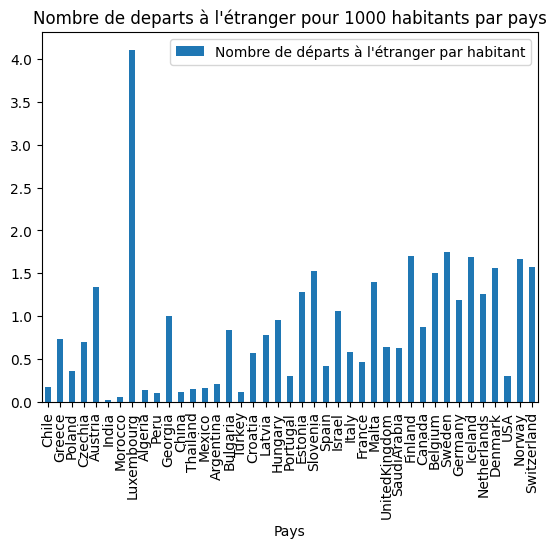

In [23]:
df["Nombre de départs à l'étranger par habitant"]=df["Nombre de départs à l'étranger par an pour 1000 habitants"]/1000
histogramme(X="Pays", Y="Nombre de départs à l'étranger par habitant", titre = "Nombre de departs à l'étranger pour 1000 habitants par pays", titrex="Pays", tri="PIB / habitant")

On a ici ordonné les pays par ordre croissant de PIB/habitant. On remarque donc bien que le tourismes à l'étranger augemente globalement avec la richesse du pays. Ainsi, bien que le voyage et le tourisme soit un fait de société, c'est un fait permis par la richesse. 
Le tourisme est donc menacé en partie par une chute possible de l'économie mondiale, restreignant les voyages à l'étranger, et menaçant l'économie des pays hotes de tourismes comme la France. Pourtant, l'avenir du tourisme est positif à cours termes puisque même les recessions des dernieres années dûes au COVID, n'ont affecté que temporairement le tourisme. 

    Ceci prouve que tant que le tourisme et les voyages restent des faits de société, les variations économiques n'auront pas d'impacts longs sur le secteurtouristique.

## Conclusion

### Eléments de réponse

### Axes d'approfondissement 

* On pourrait étendre l'étude comme évoqué rapidement au-dessus en récupérant des données d'avis/ressentis des touristes. En effet le plus parlant ne sont pas forcément les chiffres mais également les commentaires/retours des touristes, qui permettront de juger de l'importance de la disponibilité en hôtels, en restauration, en qualité de vie, en qualité de nourriture ou encore en qualité de service tertiaire lié au tourisme.

    Pour cela on pourrait se baser sur des notes données par les concernées (par exemple la moyenne des étoiles données sur des sites de référencement comme Google, TripAdvisor... tant que les données sont fiables) ou encore même aller plus loin en exploitant les commentaires associés en utilisant des prgorammes de MachineLearning ou de traitement de texte parmi une selection de mots plus ou moins positifs (correct, bien, excellent, parfait...) afin d'en tirer un avis encore plus précis sur nos différents critères (prix, nourriture, hôtels...)

* L'autre possibilité serait évidemment de compléter la base de données avec des colonnes supplémentaires telles que les capacités portuaires, les possibilités de location de véhicules, les températures, les saisons d'affluence (connaître les secteurs d'attractivité principaux : plutôt le ski ou le surf) etc..

## Difficultés rencontrées

#### La table de données

Pour recueuillir ces informations, il a fallut tirer de nombreux chiffres de différents tableaux (voir la source qui permet de télécharger donnée par donnée, donc pour avoir PIB, employés et nombre de touriste on doit combiner 3 feuilles par exemple). 

Cela nous a bloqué pendant un long moment avant de pouvoir avancer, car des fois on avait une feuille avec certains pays puis la feuille d'après sans ces pays et il fallait arriver à tout remettre en une feuille, tout en gardant les correspondances. 

Pour ce faire on a gardé une liste définie de pays (pertinents) dont on a fusionné les tables en manipulant excel (non sans problèmes, et recherche d'aide sur internet pour remettre en face des bonnes lignes/colonnes les bonnes données). Le tout nous a fait perdre beacuoup de temps mais une fois qu'on avait une table saine (cf le fichier) on a pu commencer à travailler, ce qui fut le problème le plus stressant et qui a pris le plus de temps.

#### La légende des points

Pour ce qui est de la description des points pays par pays sur un graphique on a fait appel à la fonction 'label_point' qui a due être trouvée sur internet, ne connaisant pas les manipulations techniques nécessaires à sa réalisation avec seaborn. 

Le résultat est satisfaisant quoique un peu brouillon par moment, mais permet au moins de repérer les points phares (comme la France) en dehors de la masse de points.

#### L'erreur de 'finite values' à l'exécution des hôtels

Erreur incomprise, qui n'influe pas sur le résultat du graphe final (le programme tourne quand même). Mais comme dit précédemment (la fonction 'label_point' étant guidée par internet) il en est difficile de trouver comment la corriger car il n'y a pas de raison apparente d'avoir des valeurs 'non finies', tout autant que tout le reste se passe bien quand on fait appel à la fonction.